In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch

In [6]:
dt = pd.read_excel('Reading.xlsx')
#dt.set_index(['Station'], inplace = True)
#dt = dt.replace(r'^\s*$', np.NaN, regex=True)
dt = dt.replace(r'^\s*$', np.NaN, regex=True)

In [7]:
for station in range(0, len(dt.index)-1):
    
    if dt.isnull().loc[station, 'I.S.']:
        s1 = dt.loc[station, 'B.S.']
    else:
        s1 = dt.loc[station, 'I.S.']
    
    if dt.isnull().loc[(station + 1), 'F.S.']:
        s2 = dt.loc[station + 1, 'I.S.']
    else:
        s2 = dt.loc[station + 1, 'F.S.']
        
    difference = s1 - s2

    if difference > 0:
        dt.loc[station + 1, 'RISE'] = difference
    else:
        dt.loc[station + 1, 'FALL'] = difference
    
    
    dt.loc[station + 1, 'R.L.'] = dt.loc[station, 'R.L.'] + difference
    
    

In [8]:
dt.to_excel("Solved.xlsx")

In [9]:
dt

,Station,B.S.,I.S.,F.S.,RISE,FALL,R.L.
0,0,6.5,NaN,NaN,NaN,NaN,609.8
1,100,NaN,7.4,NaN,NaN,-0.9,608.9
2,200,NaN,7.7,NaN,NaN,-0.3,608.6
3,300,NaN,8.9,NaN,NaN,-1.2,607.4
4,400,NaN,9.1,NaN,NaN,-0.2,607.2
5,500,3.5,NaN,12.0,NaN,-2.9,604.3
6,600,NaN,8.5,NaN,NaN,-5.0,599.3
7,700,NaN,6.4,NaN,2.1,NaN,601.4
8,800,NaN,7.8,NaN,NaN,-1.4,600.0
9,900,NaN,8.6,NaN,NaN,-0.8,599.2


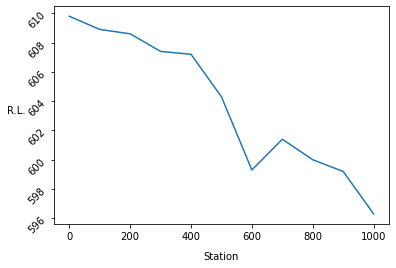

In [11]:
plt.plot(dt['Station'], dt['R.L.'])

plt.xlabel('Station', labelpad=10)
plt.ylabel('R.L.', rotation=0, labelpad=10)

plt.yticks(rotation=45)

plt.savefig('Graph.png')
plt.show()